In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from sklearn.model_selection import train_test_split

Load data

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17165596357_392a12391f.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17165596357_392a12391f.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg')]

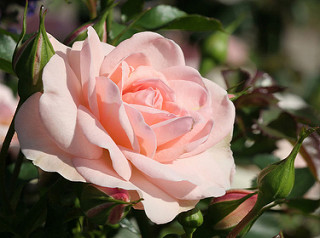

In [8]:
PIL.Image.open(str(roses[1]))

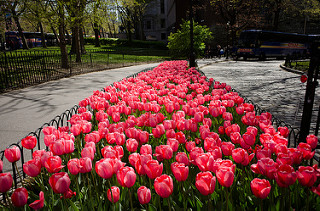

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

Read flower images as numpy array using opencv

In [10]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [11]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [12]:
flower_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17165596357_392a12391f.jpg'),
 PosixPath('datasets/flower_photos/roses/921984328_a60076f070_m.jpg')]

In [13]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [14]:
img.shape

(245, 320, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
  for image  in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:

X = np.array(X)
y = np.array(y)
y[:5]

array([0, 0, 0, 0, 0])

Split the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape

((2936, 180, 180, 3), (734, 180, 180, 3))

Scale the data

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

Build CNN model

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 14s 25ms/step - loss: 1.3092 - accuracy: 0.4595
Epoch 2/30
92/92 [==============================] - 2s 23ms/step - loss: 0.9249 - accuracy: 0.6434
Epoch 3/30
92/92 [==============================] - 2s 23ms/step - loss: 0.7323 - accuracy: 0.7224
Epoch 4/30
92/92 [==============================] - 2s 23ms/step - loss: 0.5131 - accuracy: 0.8171
Epoch 5/30
92/92 [==============================] - 2s 23ms/step - loss: 0.3027 - accuracy: 0.8954
Epoch 6/30
92/92 [==============================] - 2s 23ms/step - loss: 0.1696 - accuracy: 0.9547
Epoch 7/30
92/92 [==============================] - 2s 25ms/step - loss: 0.1145 - accuracy: 0.9636
Epoch 8/30
92/92 [==============================] - 2s 24ms/step - loss: 0.0700 - accuracy: 0.9806
Epoch 9/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 10/30
92/92 [==============================] - 2s 23ms/step - loss: 0.0552 - accuracy: 0.9840
Epoch 11

In [23]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 21ms/step - loss: 2.6416 - accuracy: 0.6390


[2.641554832458496, 0.6389645934104919]

Here we can see the accuracy is very high(99%) with training samples. But in testing samples it's too low. (63%) This happen because our model overfitted with training data

In [24]:
prediction = model.predict(X_test_scaled)
prediction[1]

array([ -2.8076303,  10.956394 ,   0.2553872, -10.441501 ,   5.3909445],
      dtype=float32)

In [25]:
score = tf.nn.softmax(prediction[1])
np.argmax(score)

1

In [26]:
y_test[1]

0

Improve test accuracy using Data Augmentation

In [30]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

Original image

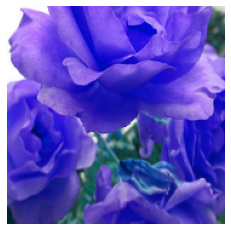

In [31]:
plt.axis('off')
plt.imshow(X[0])

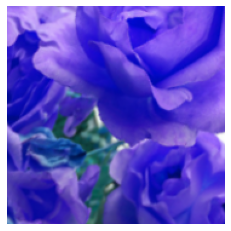

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

Train the model with data augmentation and dropout

In [38]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5)
])
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 4s 27ms/step - loss: 1.2661 - accuracy: 0.4670
Epoch 2/30
92/92 [==============================] - 2s 26ms/step - loss: 1.0270 - accuracy: 0.5920
Epoch 3/30
92/92 [==============================] - 2s 26ms/step - loss: 0.9358 - accuracy: 0.6359
Epoch 4/30
92/92 [==============================] - 2s 26ms/step - loss: 0.8651 - accuracy: 0.6710
Epoch 5/30
92/92 [==============================] - 2s 27ms/step - loss: 0.8159 - accuracy: 0.6866
Epoch 6/30
92/92 [==============================] - 2s 27ms/step - loss: 0.7901 - accuracy: 0.7037
Epoch 7/30
92/92 [==============================] - 2s 27ms/step - loss: 0.7557 - accuracy: 0.7159
Epoch 8/30
92/92 [==============================] - 2s 26ms/step - loss: 0.7202 - accuracy: 0.7197
Epoch 9/30
92/92 [==============================] - 2s 26ms/step - loss: 0.6864 - accuracy: 0.7415
Epoch 10/30
92/92 [==============================] - 2s 26ms/step - loss: 0.6564 - accuracy: 0.7469
Epoch 11/

In [39]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 1s 17ms/step - loss: 0.8659 - accuracy: 0.7207


[0.8659154176712036, 0.720708429813385]

We can see we got really good accuracy than previous model (72%)